#### 트위터 활동을 통한 MBTI 예측

- 앙상블 Voting분류기로 KNN과 LogisticRegression을 사용


In [177]:
# 모듈 로딩 및 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import koreanize_matplotlib

In [178]:
DATA_FILE=r'C:\Users\kdp\Desktop\KDW\EX_Machine_Learning\data\feature.csv'
featureDF=pd.read_csv(DATA_FILE)
featureDF

,total_retweet_count,total_favorite_count,total_hashtag_count,total_url_count,total_mentions_count,total_media_count,number_of_tweets_scraped
0,600716,196,50,37,139,114,200
1,743749,339,82,43,156,34,200
2,740720,164,71,39,170,40,199
3,1925514,293,77,25,174,77,192
4,165474,438,16,11,127,99,200
...,...,...,...,...,...,...,...
8323,14228,482,15,134,262,7,199
8324,1319,5,257,0,259,2,199
8325,4373,12,46,12,98,8,109
8326,237,111,29,8,12,26,74


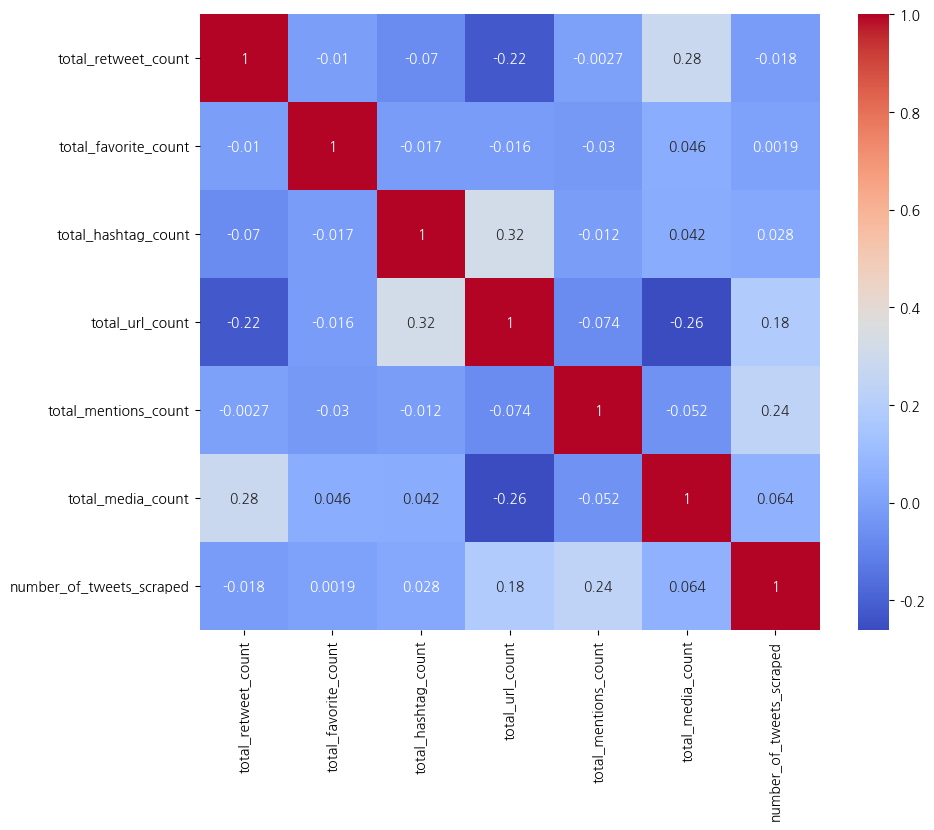

In [179]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(featureDF.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [180]:
target=pd.read_csv(r'C:\Users\kdp\Desktop\KDW\EX_Machine_Learning\data\target_2.csv')
target

,mbti_personality,ie,ns,ft,jp
0,infp,i,n,f,p
1,infp,i,n,f,p
2,infp,i,n,f,p
3,infp,i,n,f,p
4,infp,i,n,f,p
...,...,...,...,...,...
8323,estj,e,s,t,j
8324,estj,e,s,t,j
8325,estj,e,s,t,j
8326,estj,e,s,t,j


In [181]:
target_ie=target['ie']
target_ns=target['ns']
target_ft=target['ft']
target_jp=target['jp']

In [182]:
# 라벨 인코딩 (i, e를 0과 1로 변환)
le = LabelEncoder()
target_ie = le.fit_transform(target['ie'])

In [183]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, target_ie, stratify=target, random_state=38)

In [185]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (6246, 7), 2D
y_train : (6246,), 1D
X_test : (2082, 7), 2D
y_test : (2082,), 1D


- StandardScaler 사용

In [186]:
# 스케일러 인스턴스 생성
ssScaler=StandardScaler()

In [187]:
# 데이터에 기반한 StandardScaler 동작을 위한 학습 진행
ssScaler.fit(X_train, y_train)

StandardScaler()

In [188]:
# 학습용 데이터셋 스케일링 ==> ndarray 타입 반환
X_train_scaled=ssScaler.transform(X_train)
X_train_scaled.shape

(6246, 7)

In [189]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_test_scaled= ssScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((2082, 7), -11.175630662214369, 18.534745359027216)

In [190]:
# 학습 진행 ==> 앙상블의 보팅 방식 진행
# 앙상블의 보팅 방식 진행
# - 데이터셋 동일
# - 알고리즘 모델 - KNN
k_model=KNeighborsClassifier()
lr_model=LogisticRegression(solver='liblinear')
v_model=VotingClassifier(estimators=[('k_model', k_model), ('lr_model', lr_model)], voting='hard')

vs_model=VotingClassifier(estimators=[('k_model', k_model), ('lr_model', lr_model)], voting='soft')

In [191]:
v_model.fit(X_train_scaled, y_train)     # Hard, 즉 직접 선거 방식
vs_model.fit(X_train_scaled, y_train)    # Soft, 즉 간접 선거 방식으로 모델마다 확률값 합계에 평균

VotingClassifier(estimators=[('k_model', KNeighborsClassifier()),
                             ('lr_model',
                              LogisticRegression(solver='liblinear'))],
                 voting='soft')

In [192]:
# 모델 파라미터 확인
print(f'[v_model.classes_] : {v_model.classes_}')
print(f'[v_model.estimators_] : {v_model.estimators_}')
print(f'[v_model.named_estimators_] : {v_model.named_estimators_}')
print(f'[v_model.n_features_in_] : {v_model.n_features_in_}')

[v_model.classes_] : [0 1]
[v_model.estimators_] : [KNeighborsClassifier(), LogisticRegression(solver='liblinear')]
[v_model.named_estimators_] : {'k_model': KNeighborsClassifier(), 'lr_model': LogisticRegression(solver='liblinear')}
[v_model.n_features_in_] : 7


In [193]:
# 모델 성능 평가
train_score=v_model.score(X_train_scaled, y_train)
test_score=v_model.score(X_test_scaled, y_test)

soft_train_score=vs_model.score(X_train_scaled, y_train)
soft_test_score=vs_model.score(X_test_scaled, y_test)

In [194]:
print(f'[HARD VOTING] train_score : test_score = {train_score*100:.2f} % : {test_score*100:.2f} %')
print(f'[SOFT VOTING] train_score : test_score = {soft_train_score*100:.2f} % : {soft_test_score*100:.2f} %')

[HARD VOTING] train_score : test_score = 69.31 % : 51.44 %
[SOFT VOTING] train_score : test_score = 69.32 % : 51.83 %


In [195]:
param_grid = {'n_neighbors': range(1, 30), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', refit=True)
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [196]:
# 최적의 하이퍼파라미터 확인
print("Best parameters found: ", grid_knn.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_knn.best_score_))

Best parameters found:  {'n_neighbors': 29, 'weights': 'distance'}
Best cross-validation accuracy: 0.55


In [197]:
from sklearn.metrics import confusion_matrix

In [198]:
# 테스트 세트에서 성능 확인
y_pred = grid_knn.predict(X_test_scaled)
grid_knn_mat = confusion_matrix(y_test, y_pred)
grid_knn_report = classification_report(y_test, y_pred)
print(f"grid KNN matrix:\n{grid_knn_mat}\n")
print(f"grid KNN report:\n{grid_knn_report}")

grid KNN matrix:
[[309 614]
 [320 839]]

grid KNN report:
              precision    recall  f1-score   support

           0       0.49      0.33      0.40       923
           1       0.58      0.72      0.64      1159

    accuracy                           0.55      2082
   macro avg       0.53      0.53      0.52      2082
weighted avg       0.54      0.55      0.53      2082



In [199]:
from sklearn.metrics import accuracy_score

In [200]:
best_knn_model = grid_knn.best_estimator_
best_knn_model.n_neighbors = best_knn_model.n_neighbors

# 테스트 세트에서 성능 확인
best_knn_pred = best_knn_model.predict(X_test_scaled)
best_knn_mat = confusion_matrix(y_test, best_knn_pred)
best_knn_acc = accuracy_score(y_test, y_pred)
best_knn_report = classification_report(y_test, best_knn_pred)
best_knn_train_score = best_knn_model.score(X_train_scaled, y_train)
best_knn_test_score = best_knn_model.score(X_test_scaled, y_test)

print(f"best KNN Train score: {best_knn_train_score*100:.2f} %")
print(f"best KNN Test score: {best_knn_test_score*100:.2f} %\n")
print(f"best KNN matrix:\n{best_knn_mat}\n")
print(f"best KNN accuracy:{best_knn_acc*100:.2f} %")
print(f"best KNN report:\n{best_knn_report}")

best KNN Train score: 100.00 %
best KNN Test score: 55.14 %

best KNN matrix:
[[309 614]
 [320 839]]

best KNN accuracy:55.14 %
best KNN report:
              precision    recall  f1-score   support

           0       0.49      0.33      0.40       923
           1       0.58      0.72      0.64      1159

    accuracy                           0.55      2082
   macro avg       0.53      0.53      0.52      2082
weighted avg       0.54      0.55      0.53      2082



In [201]:
best_knn_model.n_neighbors

29

In [202]:
new_data = pd.DataFrame([[164449,29,24,49,258,8,180]], columns=['total_retweet_count','total_favorite_count','total_hashtag_count','total_url_count','total_mentions_count','total_media_count','number_of_tweets_scraped'])
new_data

,total_retweet_count,total_favorite_count,total_hashtag_count,total_url_count,total_mentions_count,total_media_count,number_of_tweets_scraped
0,164449,29,24,49,258,8,180


In [203]:
new_data_scaled= ssScaler.transform(new_data)
new_data_scaled

array([[-0.34867663, -0.077156  , -0.28582542, -0.23429346,  1.07002173,
        -0.92681782, -0.94786479]])

In [204]:
new_data_pred = grid_knn.predict(new_data_scaled)
print(f"Prediction for new data: {new_data_pred}")

Prediction for new data: [1]


In [205]:
# 새로운 데이터에 대한 예측 확률
new_data_proba = grid_knn.predict_proba(new_data_scaled)

# 새로운 데이터 예측 확률 출력
print(f"Prediction probabilities for new data: {new_data_proba}")

Prediction probabilities for new data: [[0.48769903 0.51230097]]


- MinMaxScaler 사용

In [206]:
mmScaler=MinMaxScaler()
mmScaler.fit(X_train, y_train)

MinMaxScaler()

In [207]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.10497238]),
 array([ 0.,  0.,  0.,  0.,  0.,  0., 19.]),
 array([3.22981622e-08, 9.88420652e-07, 9.23361034e-04, 3.96825397e-03,
        7.57002271e-04, 5.23560209e-03, 5.52486188e-03]),
 array([3.0961514e+07, 1.0117150e+06, 1.0830000e+03, 2.5200000e+02,
        1.3210000e+03, 1.9100000e+02, 2.0000000e+02]))

In [208]:
X_train_scaled=mmScaler.transform(X_train)
X_test_scaled=mmScaler.transform(X_test)
X_train_scaled.shape

(6246, 7)

In [209]:
k_model=KNeighborsClassifier()
lr_model=LogisticRegression(solver='liblinear')
v_model=VotingClassifier(estimators=[('k_model', k_model), ('lr_model', lr_model)], voting='hard')

vs_model=VotingClassifier(estimators=[('k_model', k_model), ('lr_model', lr_model)], voting='soft')

In [210]:
v_model.fit(X_train_scaled, y_train)     
vs_model.fit(X_train_scaled, y_train)  

VotingClassifier(estimators=[('k_model', KNeighborsClassifier()),
                             ('lr_model',
                              LogisticRegression(solver='liblinear'))],
                 voting='soft')

In [211]:
print(f'[v_model.classes_] : {v_model.classes_}')
print(f'[v_model.estimators_] : {v_model.estimators_}')
print(f'[v_model.named_estimators_] : {v_model.named_estimators_}')
print(f'[v_model.n_features_in_] : {v_model.n_features_in_}')

[v_model.classes_] : [0 1]
[v_model.estimators_] : [KNeighborsClassifier(), LogisticRegression(solver='liblinear')]
[v_model.named_estimators_] : {'k_model': KNeighborsClassifier(), 'lr_model': LogisticRegression(solver='liblinear')}
[v_model.n_features_in_] : 7


In [213]:
train_score=v_model.score(X_train_scaled, y_train)
test_score=v_model.score(X_test_scaled, y_test)

soft_train_score=vs_model.score(X_train_scaled, y_train)
soft_test_score=vs_model.score(X_test_scaled, y_test)

In [214]:
print(f'[HARD VOTING] train_score : test_score = {train_score*100:.2f} % : {test_score*100:.2f} %')
print(f'[SOFT VOTING] train_score : test_score = {soft_train_score*100:.2f} % : {soft_test_score*100:.2f} %')

[HARD VOTING] train_score : test_score = 69.72 % : 52.07 %
[SOFT VOTING] train_score : test_score = 69.60 % : 52.21 %


In [215]:
param_grid = {'n_neighbors': range(1, 30), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [216]:
# 최적의 하이퍼파라미터 확인
print("Best parameters found: ", grid_knn.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_knn.best_score_))

Best parameters found:  {'n_neighbors': 28, 'weights': 'distance'}
Best cross-validation accuracy: 0.56


In [217]:
# 테스트 세트에서 성능 확인
y_pred = grid_knn.predict(X_test_scaled)
grid_knn_mat = confusion_matrix(y_test, y_pred)
grid_knn_report = classification_report(y_test, y_pred)
print(f"grid KNN matrix:\n{grid_knn_mat}\n")
print(f"grid KNN report:\n{grid_knn_report}")

grid KNN matrix:
[[320 603]
 [336 823]]

grid KNN report:
              precision    recall  f1-score   support

           0       0.49      0.35      0.41       923
           1       0.58      0.71      0.64      1159

    accuracy                           0.55      2082
   macro avg       0.53      0.53      0.52      2082
weighted avg       0.54      0.55      0.53      2082



In [218]:
best_knn_model = grid_knn.best_estimator_
best_knn_model.n_neighbors = best_knn_model.n_neighbors

# 테스트 세트에서 성능 확인
best_knn_pred = best_knn_model.predict(X_test_scaled)
best_knn_mat = confusion_matrix(y_test, best_knn_pred)
best_knn_acc = accuracy_score(y_test, y_pred)
best_knn_report = classification_report(y_test, best_knn_pred)
best_knn_train_score = best_knn_model.score(X_train_scaled, y_train)
best_knn_test_score = best_knn_model.score(X_test_scaled, y_test)

print(f"best KNN Train score: {best_knn_train_score*100:.2f} %")
print(f"best KNN Test score: {best_knn_test_score*100:.2f} %\n")
print(f"best KNN matrix:\n{best_knn_mat}\n")
print(f"best KNN accuracy:{best_knn_acc*100:.2f} %")
print(f"best KNN report:\n{best_knn_report}")

best KNN Train score: 100.00 %
best KNN Test score: 54.90 %

best KNN matrix:
[[320 603]
 [336 823]]

best KNN accuracy:54.90 %
best KNN report:
              precision    recall  f1-score   support

           0       0.49      0.35      0.41       923
           1       0.58      0.71      0.64      1159

    accuracy                           0.55      2082
   macro avg       0.53      0.53      0.52      2082
weighted avg       0.54      0.55      0.53      2082



In [219]:
best_knn_model = grid_knn.best_estimator_
best_knn_model.n_neighbors

28

In [220]:
new_data = pd.DataFrame([[12,127,15,35,65,13,222]], columns=['total_retweet_count','total_favorite_count','total_hashtag_count','total_url_count','total_mentions_count','total_media_count','number_of_tweets_scraped'])
new_data

,total_retweet_count,total_favorite_count,total_hashtag_count,total_url_count,total_mentions_count,total_media_count,number_of_tweets_scraped
0,12,127,15,35,65,13,222


In [221]:
new_data_scaled= mmScaler.transform(new_data)

In [222]:
new_data_pred = grid_knn.predict(new_data_scaled)
print(f"Prediction for new data: {new_data_pred}")

Prediction for new data: [1]


In [223]:
# 새로운 데이터에 대한 예측 확률
new_data_proba = grid_knn.predict_proba(new_data_scaled)

# 새로운 데이터 예측 확률 출력
print(f"새로운 데이터 예측 확률[i, e]: {new_data_proba}")

새로운 데이터 예측 확률[i, e]: [[0.43088497 0.56911503]]


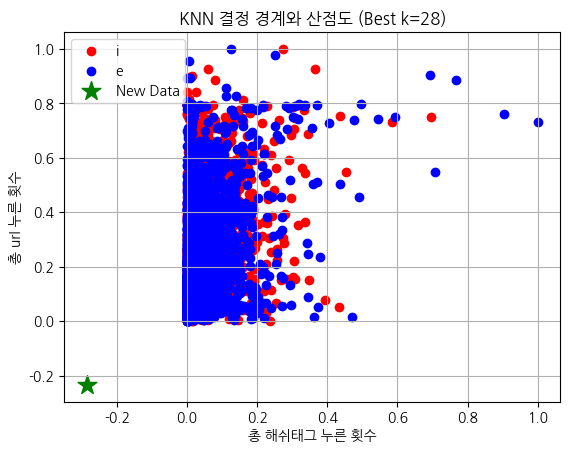

In [241]:
# 중요한 두 가지 특징 선택 ('total_hashtag_count', 'total_url_count')
X_train_important = X_train_scaled[:, [2, 3]]  
X_test_important = X_test_scaled[:, [2, 3]]

# KNN 모델 재학습 (2개의 특징만 사용)
k_model_important = KNeighborsClassifier(n_neighbors=best_knn_model.n_neighbors, weights=best_knn_model.weights)
k_model_important.fit(X_train_important, y_train)

# 시각화 영역 설정을 위한 범위 계산
x_min, x_max = X_train_important[:, 0].min() - 1, X_train_important[:, 0].max() + 1
y_min, y_max = X_train_important[:, 1].min() - 1, X_train_important[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# 각 좌표에서의 KNN 예측
Z = k_model_important.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# 학습 데이터 포인트 시각화
plt.scatter(X_train_important[y_train == 0, 0], X_train_important[y_train == 0, 1], color='red', label='i')
plt.scatter(X_train_important[y_train == 1, 0], X_train_important[y_train == 1, 1], color='blue', label='e')

# 새로운 데이터 시각화 (total_retweet_count, total_favorite_count)
new_data = pd.DataFrame([[164449,29,24,49,258,8,180]], columns=['total_retweet_count','total_favorite_count','total_hashtag_count','total_url_count','total_mentions_count','total_media_count','number_of_tweets_scraped'])
new_data_scaled= ssScaler.transform(new_data)
new_data_scaled_important = new_data_scaled[:, [2, 3]]
plt.scatter(new_data_scaled_important[:, 0], new_data_scaled_important[:, 1], color='green', label='New Data', marker='*', s=200)

plt.title(f"KNN 결정 경계와 산점도 (Best k={best_knn_model.n_neighbors})")
plt.xlabel("총 해쉬태그 누른 횟수")
plt.ylabel("총 url 누른 횟수")
plt.legend()
plt.grid(True)
plt.show()